# GoT_Character_relevance_evolution Ruben Tak

In this project, we explore network analysis and visualisation techniques applied to the popular book and HBO series "Game of Thrones." The goal is to gain insights into the relationships and importance of characters within the narrative using network graphs and centrality measures. The project utilises Python libraries such as NetworkX, Pandas, and Pyvis to analyse the network structure, visualize the connections between characters, and calculate centrality measures.

This project is part of a Medium article I wrote, which can be found [here](https://medium.com/@rubentak/game-of-thrones-character-relevance-evolution-9b6a3a0d9f3a).


# Network Analysis of Book 1: Game of Thrones

In [39]:
# Importing the required libraries
import networkx as nx
import pandas as pd
%matplotlib inline

In [40]:
# Reading in the data of book 1
d1=pd.read_csv('../data/book1.csv')

In [41]:
# Printing out the head of the data
d1

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
...,...,...,...,...,...
679,Tyrion-Lannister,Willis-Wode,Undirected,4,1
680,Tyrion-Lannister,Yoren,Undirected,10,1
681,Tywin-Lannister,Varys,Undirected,4,1
682,Tywin-Lannister,Walder-Frey,Undirected,8,1


In [42]:
# Printing out the number of unique characters
print("Number of unique characters: ", len(d1['Source'].unique()))

Number of unique characters:  139


In [43]:
# Printing out the combination of characters and the number of interactions
print(d1['Target'].value_counts())

Robert-Baratheon    41
Tyrion-Lannister    41
Sansa-Stark         31
Robb-Stark          22
Tywin-Lannister     20
                    ..
Desmond              1
Hosteen-Frey         1
Jommo                1
Grenn                1
Ulf-son-of-Umar      1
Name: Target, Length: 143, dtype: int64


In [44]:
# Creating an empty graph object
b1 = nx.Graph()

In [45]:
# Iterating through the DataFrame to add edges
for _, edge in d1.iterrows():
    b1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

In [46]:
# Printing out the number of nodes and edges in the graph
print("Total number of nodes: ", int(b1.number_of_nodes()))
print("Total number of edges: ", int(b1.number_of_edges()))

Total number of nodes:  187
Total number of edges:  684


# Measurements

A brief explanation of the four centrality measures:

1. Eigenvector Centrality: This measure assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the centrality score of a node than connections to low-scoring nodes. It is a measure of the influence of a node in the network.

2. Closeness Centrality: This measure calculates the sum of the shortest path lengths between a node and all other nodes in the network. It is a measure of how close a node is to all other nodes in the network, and it can be used to identify nodes that can quickly interact with other nodes in the network.

3. Degree Centrality: This measure calculates the number of edges connected to a node (its degree). It is a simple measure of the number of direct connections a node has in the network.

4. Betweenness Centrality: This measure calculates the number of shortest paths between all pairs of nodes that pass through a given node. It is a measure of the extent to which a node acts as a bridge between other nodes in the network.

The code snippet creates a DataFrame `cor5` from the centrality measures, calculates the pairwise correlation between the measures using the `corr()` function, and prints the correlation matrix.

In [47]:
# Calculate other centrality measures for each book
for book_number in range(1, 6):
    data = pd.read_csv(f'../data/book{book_number}.csv')
    graph = nx.Graph()
    for _, edge in data.iterrows():
        graph.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

    betweenness_centrality = nx.betweenness_centrality(graph)
    closeness_centrality = nx.closeness_centrality(graph)
    eigenvector_centrality = nx.eigenvector_centrality(graph)

    # You can then analyze how these measures change over tim

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

measures = [
    ("Eigenvector Centrality", nx.eigenvector_centrality(b1)),
    ("Closeness Centrality", nx.closeness_centrality(b1)),
    ("Degree Centrality", nx.degree_centrality(b1)),
    ("Betweenness Centrality", nx.betweenness_centrality(b1))
]

# Creating the correlation DataFrame
cor_df = pd.DataFrame.from_records([m[1] for m in measures], columns=measures[0][1].keys(), index=[m[0] for m in measures])

# Calculating the correlation
corr = cor_df.T.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 220, n=256)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, annot=True, fmt=".2f",
            linewidths=.5, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)

# Adjust the alignment of x-axis and y-axis labels
ax.set_xticklabels([m[0] for m in measures], rotation=0, ha='center')
ax.set_yticklabels([m[0] for m in measures], rotation=0, va='center')

plt.show()


# Choosing metric

Degree Centrality has a high correlation with Eigenvector Centrality (0.930315) and a moderate correlation with Betweenness Centrality (0.838933). This suggests that Degree Centrality provides similar information about the nodes in the network as Eigenvector Centrality and Betweenness Centrality. It has a slightly lower correlation with Closeness Centrality (0.796965).

Given these correlations, Degree Centrality appears to be a reasonable choice for analyzing the importance of nodes in the network, as it provides similar insights to Eigenvector and Betweenness Centrality. However, it's always important to consider the context and the goal of the analysis when selecting the most appropriate centrality measure. If you're interested in the immediate connections and local influence of nodes in the network, Degree Centrality is a suitable choice. If you want to explore other aspects of the nodes' importance, such as their influence based on the quality of connections or their role as bridges between different parts of the network, you might want to consider using Eigenvector or Betweenness Centrality.

For the scope of this notebook, I will use Degree Centrality to analyze the importance of characters in the network.

In [48]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(b1)

# Sorting the dictionaries according to their degree centrality and storing the top 5
sorted_deg_cen_book1 =  sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:5]

# Printing out the top 10 of book1 and book5
for i in range(len(sorted_deg_cen_book1)):
    print(sorted_deg_cen_book1[i][0])# Printing out the top 5 of book1

Eddard-Stark
Robert-Baratheon
Tyrion-Lannister
Catelyn-Stark
Jon-Snow


In [49]:
# Calculating the degree centrality of book 1
deg_cen_book1

{'Addam-Marbrand': 0.010752688172043012,
 'Jaime-Lannister': 0.15591397849462366,
 'Tywin-Lannister': 0.11827956989247312,
 'Aegon-I-Targaryen': 0.010752688172043012,
 'Daenerys-Targaryen': 0.11290322580645162,
 'Eddard-Stark': 0.3548387096774194,
 'Aemon-Targaryen-(Maester-Aemon)': 0.03763440860215054,
 'Alliser-Thorne': 0.05376344086021506,
 'Bowen-Marsh': 0.02688172043010753,
 'Chett': 0.016129032258064516,
 'Clydas': 0.005376344086021506,
 'Jeor-Mormont': 0.06989247311827958,
 'Jon-Snow': 0.19892473118279572,
 'Samwell-Tarly': 0.06451612903225806,
 'Aerys-II-Targaryen': 0.03225806451612903,
 'Brandon-Stark': 0.03225806451612903,
 'Gerold-Hightower': 0.02688172043010753,
 'Jon-Arryn': 0.08064516129032259,
 'Robert-Baratheon': 0.2688172043010753,
 'Aggo': 0.03225806451612903,
 'Drogo': 0.10215053763440861,
 'Jhogo': 0.03225806451612903,
 'Jorah-Mormont': 0.06989247311827958,
 'Quaro': 0.02688172043010753,
 'Rakharo': 0.02688172043010753,
 'Albett': 0.016129032258064516,
 'Halder': 0.

In [50]:
# List the degree centrality of book 1 of the top 5
sorted_deg_cen_book1

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572)]

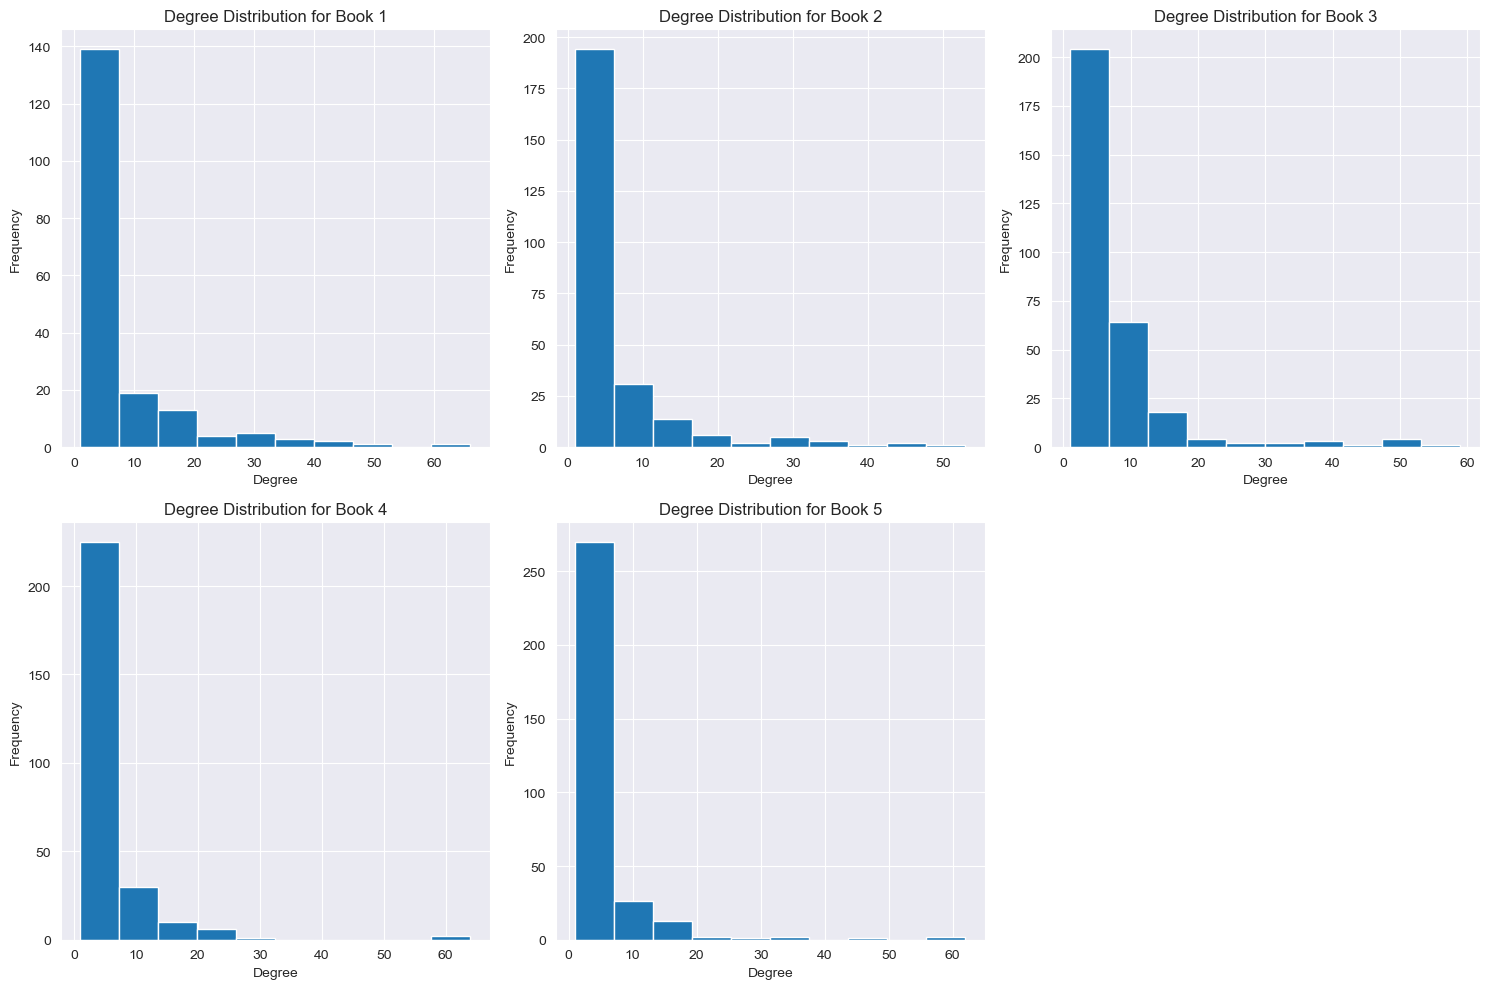

In [51]:
# Degree Distribution over the 5 books
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()  # Flatten the grid to easily iterate over it

for book_number in range(1, 6):
    data = pd.read_csv(f'../data/book{book_number}.csv')
    graph = nx.Graph()
    for _, edge in data.iterrows():
        graph.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

    degrees = [graph.degree(n) for n in graph.nodes()]

    ax = axes[book_number-1]
    ax.hist(degrees)
    ax.set_title(f'Degree Distribution for Book {book_number}')
    ax.set_xlabel('Degree')
    ax.set_ylabel('Frequency')

# Remove the extra subplot (if any)
if len(axes) > 5:
    fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

The function `process_book()` reads data from a CSV file, creates a graph, calculates the degree centrality for the nodes in the graph, filters the degree centrality for selected characters, ranks the characters based on their degree centrality, reverses the ranking order, and returns a DataFrame containing the reversed ranks and the book number.

In [52]:
import pandas as pd

def process_book(book_number):
    # Read the data
    data = pd.read_csv(f'../data/book{book_number}.csv')

    # Create a graph
    graph = nx.Graph()
    for _, edge in data.iterrows():
        graph.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

    # Calculate the degree centrality
    deg_cen = nx.degree_centrality(graph)

    # Filter the selected characters
    selected_characters = ['Jon-Snow', 'Daenerys-Targaryen', 'Tyrion-Lannister', 'Arya-Stark', 'Jaime-Lannister']
    filtered_cen = {k: deg_cen.get(k, 0) for k in selected_characters}  # Set default value of 0 if character is not found

    # Calculate the rank for each character
    rank_series = pd.Series(filtered_cen).rank(ascending=False)
    ranked_cen = rank_series.to_dict()

    # Reverse the ranking order
    reversed_rank = {k: 6 - v for k, v in ranked_cen.items()}

    # Create a DataFrame
    df = pd.DataFrame(reversed_rank, index=[0])

    # Add the book number as a column
    df['book'] = book_number

    return df

<Axes: xlabel='book'>

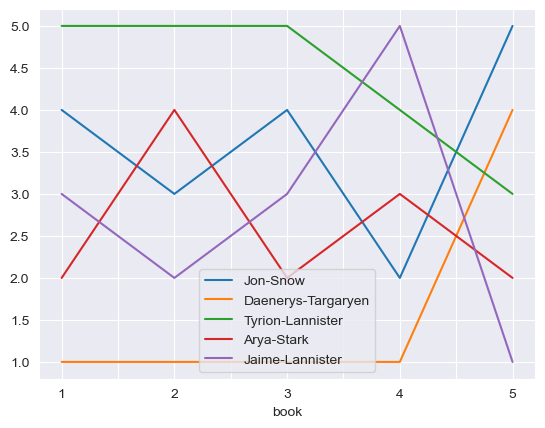

In [53]:
# Create a list of DataFrames containing degree centrality
list_of_dataframes = [process_book(book_number) for book_number in range(1, 6)]

# Concatenate the list into a single DataFrame
df = pd.concat(list_of_dataframes)

# X-axis intervals of 1-5
df['book'] = df['book'].astype('category')

# labes on the right side of the plot
ax.yaxis.tick_right()

# Plot the degree centrality evolution
df.plot(x='book')

This visualisation is okay, but the plot is a bit plain and boring. Let's try a different approach.

# Animated visualisation with faces of the characters

Let's make an animated graph with faces of the characters. The code snippet creates a list of DataFrames containing degree centrality for each book, concatenates the list into a single DataFrame, and plots the degree centrality evolution for each character in the network. The characters are than assigned a value of 5 to 1, 5 for the highest degree centrality and 1 for the lowest degree centrality of each book.

/var/folders/gc/pq01pgrs2gjf3zqjxcb9p1j80000gn/T/ipykernel_41043/4030514842.py:46: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image_resized = image.resize(size, Image.ANTIALIAS)


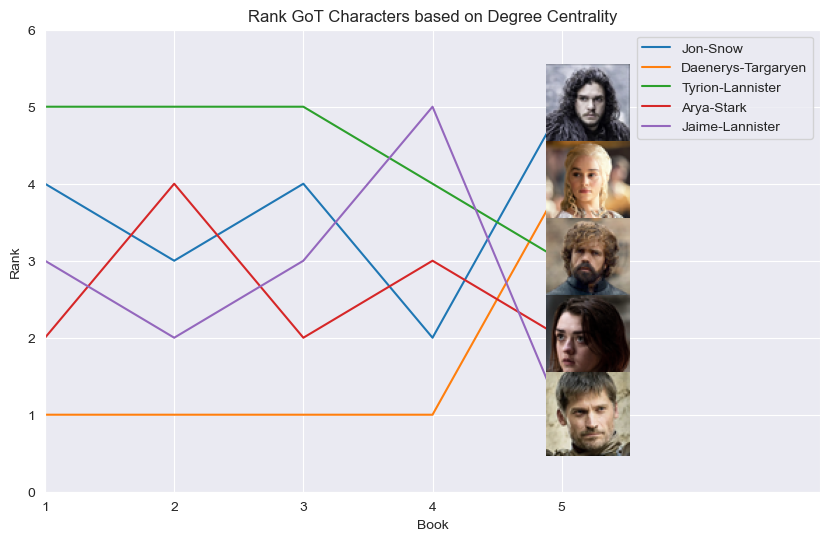

In [54]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image


selected_characters = ['Jon-Snow', 'Daenerys-Targaryen', 'Tyrion-Lannister', 'Arya-Stark', 'Jaime-Lannister']

# Create a list of DataFrames containing degree centrality
list_of_dataframes = [process_book(book_number) for book_number in range(1, 6)]

# Concatenate the list into a single DataFrame
df = pd.concat(list_of_dataframes)

# X-axis intervals of 1-5
df['book'] = df['book'].astype('int')

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(1, 7)
ax.set_ylim(0, 6)
ax.set_xlabel('Book')
ax.set_ylabel('Rank')
ax.set_xticks(range(1, 6))
ax.set_title('Rank GoT Characters based on Degree Centrality')

# Plot the rank evolution
lines = {}
for character in selected_characters:
    line, = ax.plot([], [], label=character)
    lines[character] = line

ax.legend()

# Load the character images
images = {}
for character in selected_characters:
    image_file = f"../images/{character.replace(' ', '-')}.jpeg"
    image = Image.open(image_file)

    # Resize the images
    size = (60, 60)
    image_resized = image.resize(size, Image.ANTIALIAS)

    images[character] = OffsetImage(image_resized, zoom=1)

# Animation update function
def update(frame):
    current_book = frame + 1
    current_df = df[df['book'] <= current_book]

    # Remove previous images
    for artist in ax.get_children():
        if isinstance(artist, AnnotationBbox):
            artist.remove()

    for character in selected_characters:
        lines[character].set_data(current_df['book'], current_df[character])

        # Update the image position with an offset
        x, y = current_df['book'].iloc[-1], current_df[character].iloc[-1]
        offset_x, offset_y = 0.2, 0
        ab = AnnotationBbox(images[character], (x + offset_x, y + offset_y), frameon=False)
        ax.add_artist(ab)

    return list(lines.values()) + [artist for artist in ax.get_children() if isinstance(artist, AnnotationBbox)]

# Create the animation
ani = FuncAnimation(fig, update, frames=range(5), blit=True, interval=2000)

# Display the animation in the notebook
HTML(ani.to_jshtml())

In [22]:
# Save the animation to a file
ani.save('animation.gif', writer='imagemagick', fps=0.8)

MovieWriter imagemagick unavailable; using Pillow instead.
